<span style="font-family: Arial;"><font size="6"><b>The Best Whisky For Your Buck: what to drink, what to order, and how to know what's good.</b></font></span> 

![Header Image](dylan-de-jonge-pe9T4ROjpzQ-unsplash.jpg)


<span style="font-family: Arial;"><b>Summary:
<ul>
    <li><b>The ratio of single malts to blends is 4 to 1,</li> 
    <li><b>The midrange (\$101 to \$400 USD) price range best combines affordability and high ratings,</li>  
    <li><b>Single malts from Islay and Speyside correlate with the highest ratings,</li> 
    <li><b>Highly rated whiskies consistently have taste descriptors of spice, smoke, and honey.

<span style="font-family: Arial;">The owners of Toronto micro wine bar <b>Oak&Vine</b> have decided to open a sister establishment, the micro whisky bar <b>Oak&Ember.</b> The owners want some guidance on what Scotch whiskies to stock immediately. They are looking for single malt and blended whiskies that are
    <ul>
<li>mid-priced (\$50 - \$400 USD/bottle),</li>
<li>highly-rated (85 points and above), and</li> 
<li>representative of the five whisky producing regions of Scotland.</li>
  
Furthermore, to guide their decisions as they expand their menu, the owners want to know what factors (region, taste descriptors such as “vanilla”, “smoke”, “salt,” etc.) demonstrate strong correlations with high ratings.

To start, I'll need a dataset of Scotch whiskies that includes name, price, and rating as a baseline <i>and</i> includes categorical information (region) and a description. I'm going to use a dataset webscraped from <b><i>Whisky Advocate</i></b> magazine. Their rating system is as follows: 
<ul>    
    <li>95 – 100 points: Classic. A great whisky.</li>
<li>90 – 94 points: Outstanding. A whisky of superior character and style.</li>
<li>85 – 89 points: Very good. A whisky with special qualities.</li>
<li>80 – 84 points: Good. A solid, well-made whisky.</li>
    <li>75 – 79 points: Mediocre. A drinkable whisky that may have minor flaws.</li>
<li>50 – 74 points: Not recommended.</li><br>
    </ul>

This dataset is in tabular form, so Pandas is a must, and I'll need Matplotlib and Seaborn to start my visualizations.


In [2]:
#import pandas and csv file
import pandas as pd
scotch2020 = pd.read_csv("2020 Scotch Reviews Sorted 2.csv", index_col=0, encoding='ISO-8859-1')

#put 'price' column in a numeric data form
scotch2020['price'] = scotch2020['price'].str.replace(',','',regex = True).astype(float)

#import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#import ticker to edit axis tick labels
import matplotlib.ticker as tick

<span style="font-family: Arial;">Let's begin our exploratory data analysis by looking at what we have in the dataset. Single malt whiskies (bottles from a single distillery) are considered a bit more upscale in the whisky community because they give more of a sense of place. They'll all come from one of Scotland's five whisky producing regions. Blends, on the other hand, are usually considered more approachable and more consistent.</span>

<function matplotlib.pyplot.show(close=None, block=None)>

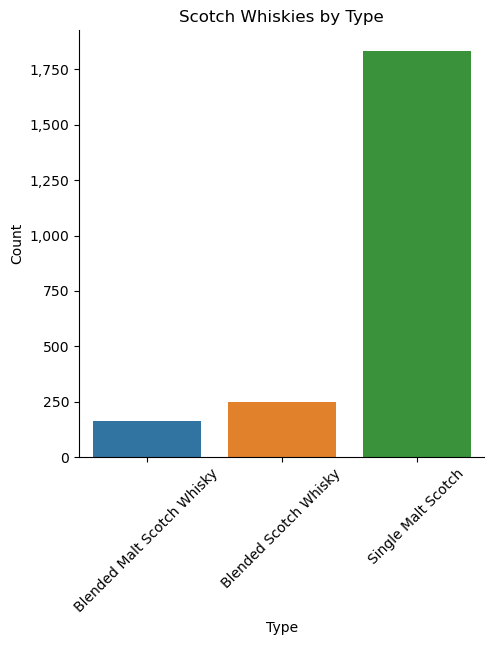

In [58]:
#exploratory data analysis 1 - countplot of blends and single malt in the dataset
sns.catplot(x='category', data=scotch2020, kind='count')
plt.xticks(rotation=45)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Scotch Whiskies by Type')

#edit y-axis tick labels to comma-separated format
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x, pos: format(int(x),",")))

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

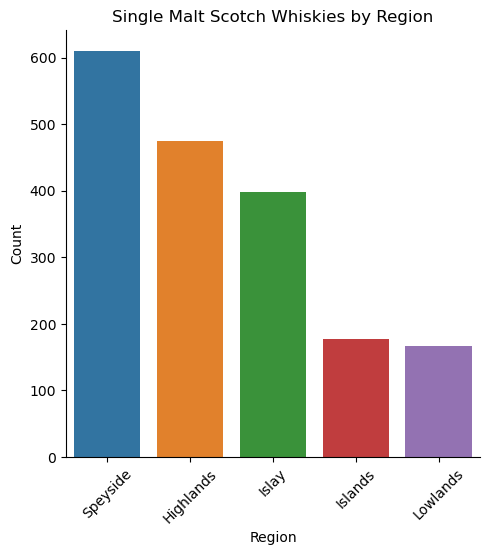

In [59]:
#exploratory data analysis 2 - countplot of bottles by region
category_order = ['Speyside','Highlands','Islay','Islands','Lowlands']
sns.catplot(x='region', data=scotch2020, kind='count', order=category_order)
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Single Malt Scotch Whiskies by Region')
plt.show

<span style="font-family: Arial;">Right away we can see that blends make up less than 20% of the total number of bottles and <b>Oak&Ember</b> should keep that ratio in mind when stocking their shelves. The Speyside region is the biggest producer while the Islands and Lowlands are the smallest.
    
Let's now take a look at prices and review points across the entire dataset. Since the dataset includes rare and collectable bottles that can cost as much as one hundred and sixty thousand USD, I'll cap the prices at \$1,000 USD. Those rare malts represent too much of a risk for a new business.</span>   

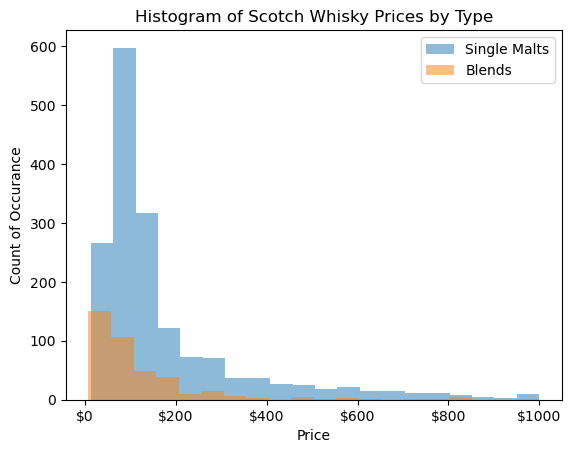

In [3]:
#exploratory data analysis 3 - price point histogram

#divide blend and single malt prices, limit prices at $1,000
single_malt_prices = scotch2020[(scotch2020['category']=='Single Malt Scotch') & (scotch2020['price']<= 1000)]['price']
blends_prices = scotch2020[scotch2020['category'].isin(['Blended Malt Scotch Whisky','Blended Scotch Whisky']) & (scotch2020['price']<= 1000)]['price']

#create layered histogram 
plt.hist(single_malt_prices, bins = 20, alpha = .5, label = "Single Malts")
plt.hist(blends_prices, bins = 20, alpha = .5, label = "Blends")

plt.legend()
plt.xlabel("Price")
plt.ylabel("Count of Occurance")
plt.title("Histogram of Scotch Whisky Prices by Type")

#edit x-axis tick labels to comma-separated values
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(lambda x, pos: format(int(x),",")))

#edit x-axis tick labels to dollars
ax.xaxis.set_major_formatter(tick.FuncFormatter(lambda x, pos: f'${int(x)}'))

plt.show()


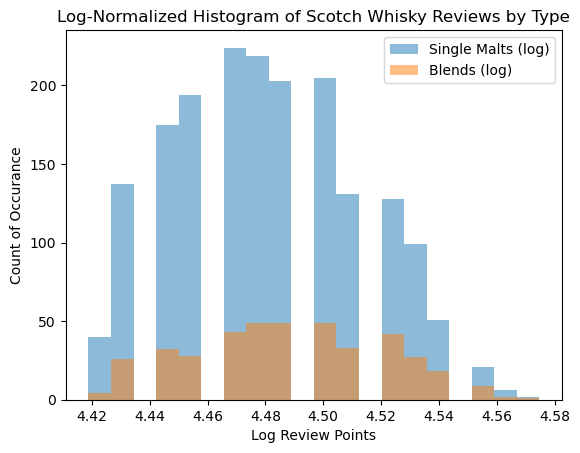

In [2]:
#exploratory data analysis 4 - review point histogram

#import NumPy to normalize results
import numpy as np

#create objects for single malt and blend reveiws
single_malt_reviews = scotch2020[scotch2020['category']=='Single Malt Scotch']['review_point']
blends_reviews = scotch2020[scotch2020['category'].isin(['Blended Malt Scotch Whisky','Blended Scotch Whisky'])]['review_point']

#create log-normalized values for histograms
single_malt_reviews_log = np.log(single_malt_reviews)
blends_reviews_log = np.log(blends_reviews)


#create layered histogram
plt.hist(single_malt_reviews_log, bins = 20, alpha = .5, label = "Single Malts (log)")
plt.hist(blends_reviews_log, bins = 20, alpha = .5, label = "Blends (log)")

plt.legend()
plt.xlabel('Log Review Points')
plt.ylabel('Count of Occurance')
plt.title('Log-Normalized Histogram of Scotch Whisky Reviews by Type')
plt.show()

<span style="font-family: Arial;">Both histograms skew to the right, with the price histogram being much more dramatic. This is good news for <b>Oak&Ember</b>, since it means there are a significant number of single malt bottles for under \$200 USD and nearly all the blends. There's also plenty to choose from in malts ranked 86 and above, although we do see a significant drop after 90.

Let's take a closer look at those prices going up to \$400 USD, this time in a side-by-side box plot comparing single malts and blends.</span> 

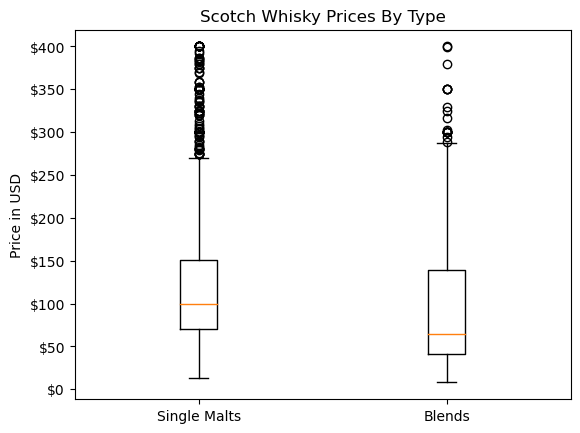

In [10]:
#exploratory data analysis 5 - modified price point box plot

#create single malt and blend categories
single_malt = scotch2020[scotch2020['category']=='Single Malt Scotch']
blends = scotch2020[scotch2020['category'].isin(['Blended Malt Scotch Whisky','Blended Scotch Whisky'])]

#eliminate all bottles over $400
single_malt = single_malt[single_malt['price'] <= 400]
blends = blends[blends['price'] <= 400]

#create side-by-side box plots for price
fig, ax = plt.subplots()
ax.boxplot([single_malt['price'],blends['price']])
ax.set_xticklabels(['Single Malts','Blends'])
ax.set_ylabel('Price in USD')
ax.set_title('Scotch Whisky Prices By Type')

#edit y-axis tick labels to dollars
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x, pos: f'${int(x)}'))

plt.show()

<span style="font-family: Arial;">We see a median price of about 100 USD for single malts and about 55 USD for blends, which is an accurate representation of bottles for general purchase, although the inter-quartile range is close to 150 USD for both. This means <b>Oak&Ember</b> should have plenty of midrange bottles to form the backbone of their menu, with a few value-priced and some premium bottles to choose from.

Now to get specific! I know the general shape of the data, and I know there should be plenty to choose from in the 50-400 range with scores of "85 - very good" and above. I'll return two lists of single malts and blends respectively that meet those critera, sorted by review points.</span>

In [18]:
#what to buy now 7 - determine minimum and maximum price
min_price = 50
max_price = 400

#return single malts in the price range sorted by review points
filtered_single_malts = single_malt[(single_malt['price'] >= min_price) & (single_malt['price'] <= max_price) & (single_malt['review_point'] >= 85)].sort_values('review_point', ascending=False)
just_the_facts = ['name','producer','region','review_point','price'] 
print(filtered_single_malts[just_the_facts])

                                                   name            producer  \
id                                                                            
15                        Glenfarclas 1968 Vintage, 43%         Glenfarclas   
17    Dun Bheagan (distilled at Springbank) Cask No....         Dun Bheagan   
22    Lombard 'Jewels of Scotland' (distilled at Bro...  Jewels of Scotland   
35                           Ardbeg Corryvreckan, 57.1%              Ardbeg   
24             Brora, 30 year old (2009 Release), 53.2%               Brora   
...                                                 ...                 ...   
2010  Lagavulin 12 year old (Diageo Special Releases...           Lagavulin   
1916  Lagavulin 12 year old (Diageo Special Releases...           Lagavulin   
1901  Lagavulin 12 year old (Diageo Special Releases...           Lagavulin   
1988  Lagavulin 12 year old (Diageo Special Release ...           Lagavulin   
2013                         Cu Bocan 2005 Vintage, 

In [19]:
#what to buy now 8 - same again for blends

filtered_blends = blends[(blends['price'] >= min_price) & (blends['price'] <= max_price) & (blends['review_point'] >= 85)].sort_values('review_point', ascending=False)
just_the_facts = ['name','review_point','price'] 
print(filtered_blends[just_the_facts])

                                                   name  review_point  price
id                                                                          
3                        Johnnie Walker Blue Label, 40%            97  225.0
9                        Compass Box The General, 53.4%            96  325.0
11                              Chivas Regal Ultis, 40%            96  160.0
12                             Chivas, 18 year old, 40%            95   70.0
32    Compass Box The Peat Monster 10th Anniversary ...            95  120.0
...                                                 ...           ...    ...
1835                         King's Crest, 25 year, 40%            85  225.0
1955         Master of Malt Reference Series III, 47.5%            85  178.0
1964  Darkness! (distilled at North British) 18 year...            85  111.0
2018                     Duncan Taylor 18 year old, 40%            85   70.0
1883         Double Malt Speyside (Second Edition), 46%            85   70.0

<span style="font-family: Arial;">We're left with a list of 1267 malts and 238 blends - a good ratio considering the proportions of malts and blends in the entire dataset - all under 400 USD and all in the "very good" range of review points. This is a bigger list than the clients asked for, but whiskies are seasonal, and the vagaries of shipping means it's good to have more than we asked for. I'd recommend comparing these lists to what local retails carry in stock. 

Since whisky releases can be limited - and new whiskies are released all the time - I'd like to give <b>Oak&Ember</b> some guiding principles for the future. Let's start with comparing prices and review points. Is it really true that you get what you pay for?
    
For ease of understanding, I'll create four price categories:
    <ul>
        <li>Value Priced (under \$100)</li>
        <li>Mid-Range (\\$101 to \\$400)</li>
        <li>High-End (\\$401 to \\$1,000)</li>
        <li>Rare ($1,000+)
</span>

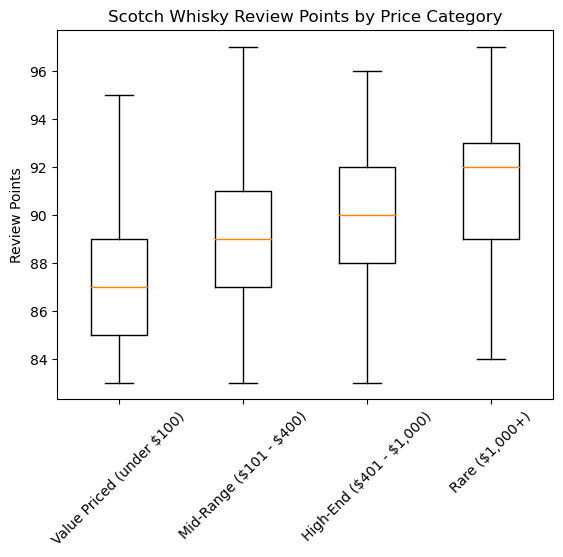

In [8]:
#correlation 9 - price and review points

#create price ranges
value = scotch2020[scotch2020['price'] <= 100]
midrange = scotch2020[(scotch2020['price'] >= 101) & (scotch2020['price'] <= 400)]
highend = scotch2020[(scotch2020['price'] >= 401) & (scotch2020['price'] <= 1000)]
rare = scotch2020[(scotch2020['price'] >= 1000)]

#create empty boxplots, boxplot data, and labels
fig, ax = plt.subplots()
boxplot_data = [value['review_point'], midrange['review_point'], highend['review_point'], rare['review_point']]
xtick_labels = ["Value Priced (under $100)", "Mid-Range (\\$101 - $400)", "High-End (\\$401 - $1,000)", "Rare ($1,000+)"]

#create boxplot with review point data by price range
ax.boxplot(boxplot_data)

ax.set_xticklabels(xtick_labels,rotation=45 )
ax.set_ylabel("Review Points")
ax.set_title("Scotch Whisky Review Points by Price Category")


plt.show()

<span style="font-family: Arial;">Interesting! Yes, there is a positive correlation between review points and price, but the biggest jump is from the value-priced to the mid-range whiskies. There's not much difference in the medians of mid-range to high-end bottles, and in fact, the mid-range category has a bigger spread! It seems that as long as you're willing to pay more than $100 USD, you're quite able to get an exceptional dram.

Let's look more closely at the five whisky producing regions of Scotland. Each region has a characteristic flavour profile - Islay whiskies are known for their fresh, salty tang and smoky aromas, for example, while Speyside whiskies are rich, spicy, and sweet - but how do the regions correlate to review points?</span>

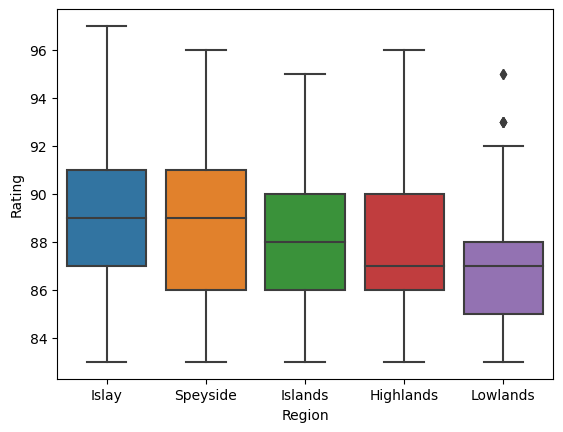

In [61]:
#correlation 10 - rankings box plot by region

#create custom order to rank by median value
custom_order = scotch2020.groupby('region')['review_point'].median().sort_values(ascending=False).index

_=sns.boxplot(x='region',y='review_point', data=scotch2020, order=custom_order)
_=plt.xlabel('Region')
_=plt.ylabel('Rating')
plt.show()

In [21]:
#correlation 10.5 - region and review points ANOVA 

#import scipy.stats
import scipy.stats as stats

#create unique regions
regions = scotch2020['region'].unique()

#create dictionary and loop
anova_results = {}
for region in regions:
    subset = scotch2020[scotch2020['region']==region]['review_point']
    anova_results[region] = subset

#perform ANOVA    
f_statistic, p_value = stats.f_oneway(*[subset for subset in anova_results.values() if not subset.empty])

print(f'F-Statistic:{f_statistic:.2f}')
print(f'p-value:{p_value:.4f}')


F-Statistic:18.53
p-value:0.0000


<span style="font-family: Arial;">The tiny island of Islay clearly punches above its weight, with a median review point equal to that of Speyside, the country's largest whisky producing region. Likewise, Highlands whiskies have a large spread but a low median, meaning they're a bit more hit and miss than the reliably high Islay bottles. 
    
To ensure that these differences I'm observing by eye in a box plot are indeed due to more than just chance, I performed an analysis of variance (ANOVA). This statistical operation results in an F-statistic, which confirms that the means show a statistically significant difference, and a p-value, which indicates how likely this difference is due to chance. Here, the results show a relatively large F-statistic and a low p-value, meaning that the differences are significant. A good takeaway is that Islay, Speyside, and Island malts generally score more favourably with <b><i>Whisky Advocate</i></b> judges.

Finally, I want to take advantage of the lengthy descriptions the tasters of <b><i>Whisky Advocate</i></b> provide in their reviews. There are certain taste descriptors that are used often when describing whiskies - sweetness (sugar, toffee, vanilla, honey), spice, salt, fruit, and floral are common examples. I wanted to know if certain descriptors corresponded to higher ratings. For this, I needed a new library used with language processing, Natural Language Toolkit, and used it to count words of interest within the 'description' column of the dataset. </span> 

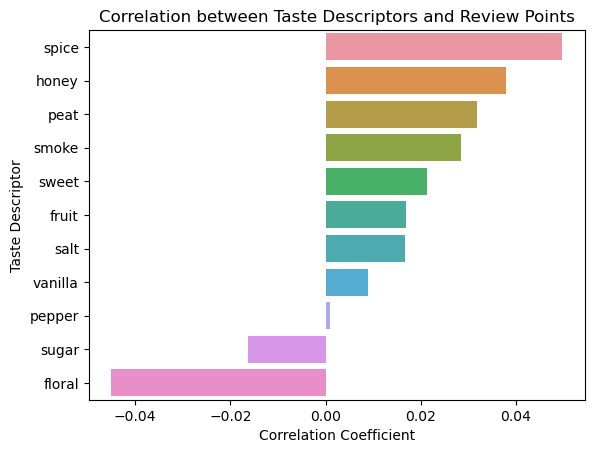

In [3]:
#correlation 11 - words of interest in the description and review points

import numpy as np
import nltk
from nltk.stem import PorterStemmer

#create stemmer to find word 'stems,' i.e., 'smoke' finds 'smoky,' 'smokey,' etc.
stemmer = PorterStemmer()

#create list of taste descriptors
words_of_interest = ['vanilla', 'smoke', 'salt', 'spice', 'peat', 'sugar', 'honey', 'sweet', 'fruit', 'floral', 'pepper']

#create empty DataFrame for word frequencies and correlations
scotch_descriptor_correlation = pd.DataFrame(columns=['Word', 'Correlation'])

#create loop for each word of interest
for word in words_of_interest:
    
    #drop rows with missing or null descriptions and make a copy of filtered DataFrame
    scotch2020_filtered = scotch2020.dropna(subset=['description']).copy()  
    
    #calculate word frequency in 'description' column
    scotch2020_filtered[word] = scotch2020_filtered['description'].apply(lambda x: x.split()).apply(lambda x: [stemmer.stem(token) for token in x]).apply(lambda x: x.count(stemmer.stem(word)))
    
    #calculate correlation between word frequency and review points
    correlation = np.corrcoef(scotch2020_filtered[word], scotch2020_filtered['review_point'])[0, 1]
    
    #concatenate word and correlation to empty DataFrame
    scotch_descriptor_correlation = scotch_descriptor_correlation = pd.concat([scotch_descriptor_correlation, pd.DataFrame({'Word':[word], 'Correlation':[correlation]})], ignore_index = True)
    
#sort DataFrame by strength of correlation:
scotch_descriptor_correlation = scotch_descriptor_correlation.sort_values(by="Correlation", ascending = False)

#create barplot
sns.barplot(x="Correlation", y="Word", data=scotch_descriptor_correlation)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Taste Descriptor")
plt.title("Correlation between Taste Descriptors and Review Points")

plt.show()


<span style="font-family: Arial;">The result of the correlation calculation uses NumPy's 'correlation coefficient' - the closer this number is to 1, the stronger the positive correlation, and the closer to negative 1, the stronger the negative correlation. "Spice" and related words score quite high, indicating that bottles with this description tend to get more review points. "Peat" and "smoke" here are synonymous, and combined, they also score high. On the other hand, bottles described as "sugary" tend to score low, and those with "floral" notes exceptionally low. 

The owners of <b>Oak&Ember</b> now have a great data-driven road map for furthering their whisky stock.

<li>The ratio of blends to single malts should be around 20/80.
<li>Between \$100 and \$400 USD is the sweet spot for bottles that provide a great experience for the best price.</li>
<li>Bottles from Islay, Speyside, and the Island whisky producing regions consistently get higher reviews, while Highlands and Lowlands bottles get lower.</li>
<li>Whiskies described as spicy, smoky or peaty, and with honey sweetness are more likely to score well, where whiskies described with sugar sweetness or floral notes are not.</li>

As the Scots say - <i>slainte mhath!</i>
